In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import pandas as pd
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Load the data
- Load processed_moments.csv which preprocessed from cleaned_hm.csv using R.

- Load demographic.csv which contains demographic information of the workers who contributed to the dataset.

- Join tables for future analysis.


In [2]:
happy_moments = pd.read_csv('../output/processed_moments.csv')

demo = pd.read_csv('https://raw.githubusercontent.com/rit-public/HappyDB/master/happydb/data/demographic.csv')

combined_data = pd.merge(happy_moments, demo, on='wid')

# Quicklook of data distribution
- Show how the data is distributed based on sex and marital status.

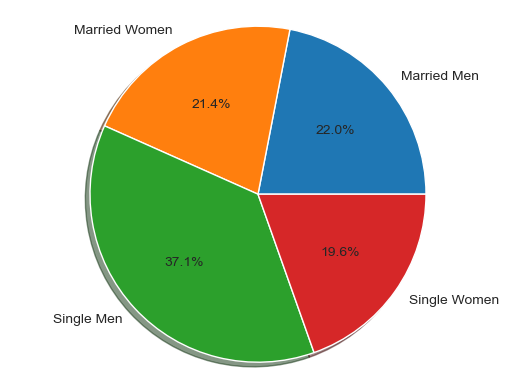

In [11]:
def filter_data(data, marital_status, gender):
    return data[(data['marital'] == marital_status) & (data['gender'] == gender)]

counts = {}
for status in ['married', 'single']:
    for gender in ['m', 'f']:
        key = f"{status.capitalize()} {'Women' if gender == 'f' else 'Men'}"
        counts[key] = filter_data(combined_data, status, gender).shape[0]

plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', shadow=True)
plt.axis('equal') 
plt.show()

# Remove stopwords
Remove stopwords, include some customized stopwords which have high frequencies but not beneficial to our analysis.

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
custom_stopwords = ['day', 'time', 'watched', 'feel', 'enjoyed', 'found', 'played', 'finally', 'moment', 'night', 'life', 'nice', 'bought', 'event', 'favorite', 'morning', 'received', 'started', 'finished', 'hours']
all_stopwords = set(stopwords.words('english') + custom_stopwords)

[nltk_data] Downloading package punkt to /Users/jiaqiliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiaqiliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# - "Data Story" on what actually makes a married man happy. 
- As shown in the word clouds, we can see that married male's happy moments are mostly about wife and kids.

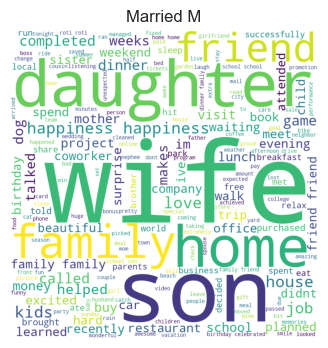

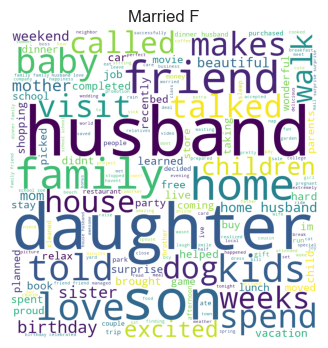

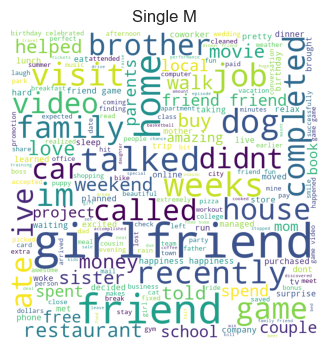

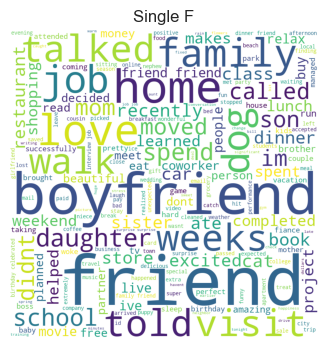

In [13]:
def create_word_cloud(text, title):
    words = word_tokenize(text.lower())
    filtered_text = ' '.join([word for word in words if word.isalpha() and word not in all_stopwords])
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(filtered_text)
    plt.figure(figsize=(4, 4), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title)
    plt.show()

for status in ['married', 'single']:
    for gender in ['m', 'f']:
        subset = filter_data(combined_data, status, gender)
        all_text = ' '.join(subset['text'].dropna()) 
        create_word_cloud(all_text, f'{status.capitalize()} {gender.upper()}')

## Comparing happy moments of married male to married female.
- Both married male to married female frequently mention 'friend', 'family', 'son', 'daughter', 'home', 'dinner', and 'birthday' in their happy moments. This suggests that relationships and family-oriented activities play a significant role in most married couples's happy moments.
- Married women mention 'love' more frequently than men, which might suggest a greater emphasis on emotional expressions in their happy moments. Conversely, married men mention 'game' and 'job', indicating leisure activities and professional life as significant contributors to their happiness, which are absent in the women's list.
## Comparing happy moments of married male to single male.
- For married men, 'wife', 'son', and 'daughter' are prominent, indicating a strong focus on immediate family. In contrast, single men frequently mention 'girlfriend', suggesting a focus on romantic relationships outside of marriage. The word 'game' is more prevalent among single men, highlighting leisure and hobbies as a significant source of happiness, which is less prominent for married men.
- Both married and single male frequently mention 'friend', 'family', 'home', 'dinner', and 'job' in their happy moments. This suggests that irrespective of marital status, social interactions, domestic life, and professional aspects are common contributors to happiness.
- Single men mention 'dog' more frequently than married men, indicate that pets are important companions for male before marriage. The word 'surprise' appears in the single men’s list but not in the married men's, which might suggest a greater appreciation or occurrence of unexpected positive events among single men.

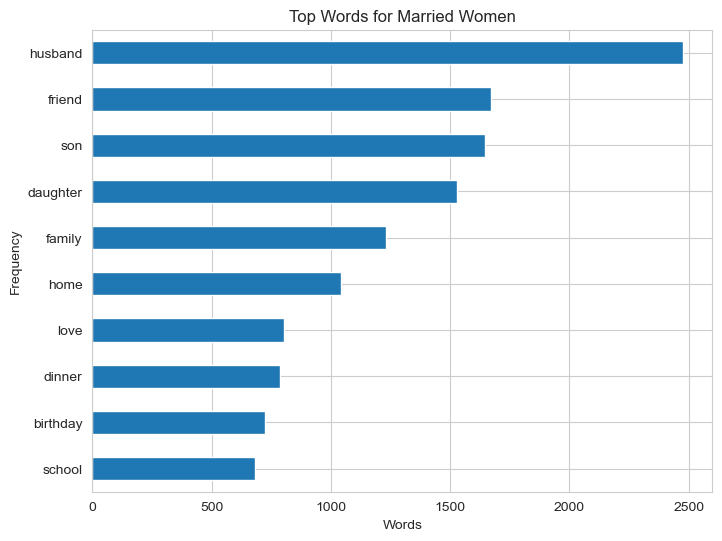

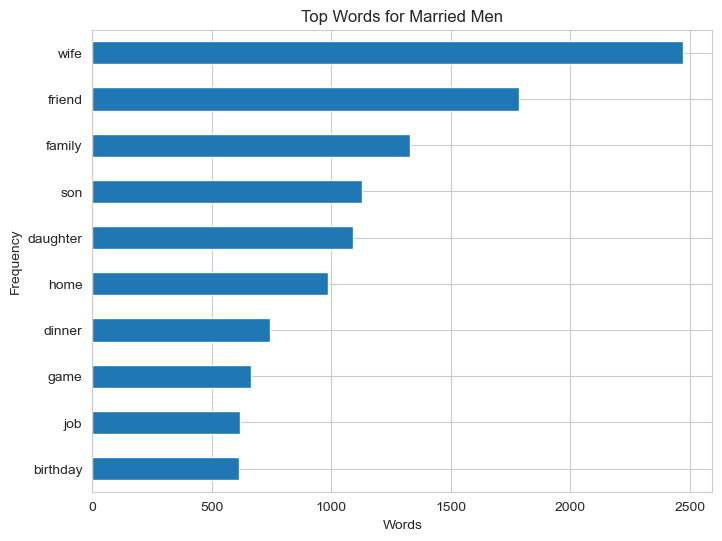

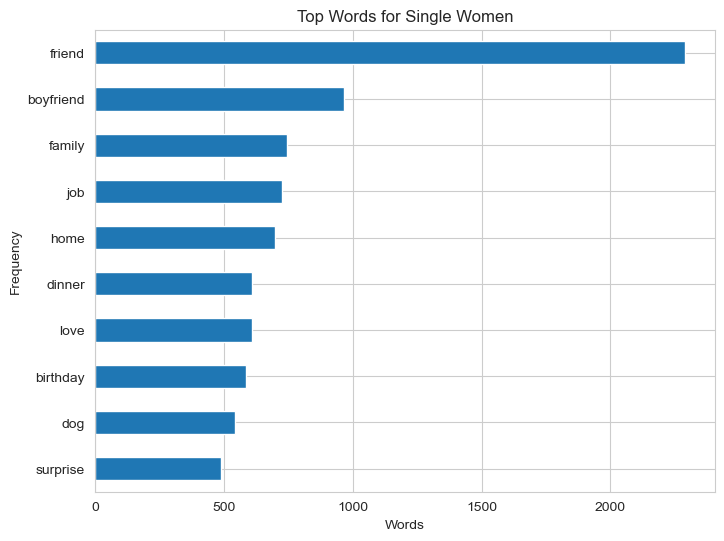

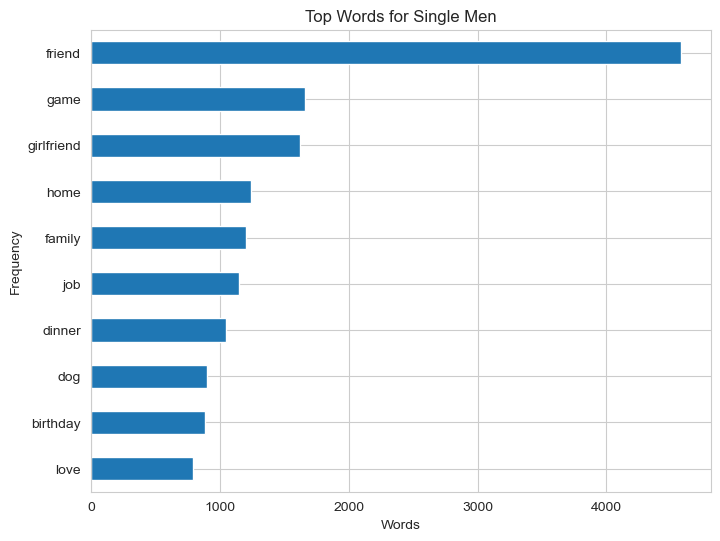

In [19]:
def get_word_frequencies(text_data):
    words = word_tokenize(text_data.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in all_stopwords]
    return pd.Series(filtered_words).value_counts()

class_names = ['Married Women', 'Married Men', 'Single Women', 'Single Men']
marital_status = ['married', 'married', 'single', 'single']
genders = ['f', 'm', 'f', 'm']
frequency = dict()
for i, (status, gender) in enumerate(zip(marital_status, genders)):
    subset = combined_data[(combined_data['marital'] == status) & (combined_data['gender'] == gender)]
    all_text = ' '.join(subset['text'].dropna())
    freqs = get_word_frequencies(all_text)
    frequency[class_names[i]] = freqs.head(10)

    plt.figure(figsize=(8, 6))
    freqs.head(10).plot(kind='barh')
    plt.gca().invert_yaxis() 
    plt.title(f'Top Words for {class_names[i]}')
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()

{'Married Women': husband     2475
 friend      1671
 son         1645
 daughter    1530
 family      1232
 home        1044
 love         804
 dinner       787
 birthday     724
 school       681
 Name: count, dtype: int64,
 'Married Men': wife        2470
 friend      1785
 family      1327
 son         1130
 daughter    1092
 home         985
 dinner       745
 game         662
 job          620
 birthday     612
 Name: count, dtype: int64,
 'Single Women': friend       2290
 boyfriend     968
 family        744
 job           726
 home          699
 dinner        611
 love          610
 birthday      587
 dog           542
 surprise      491
 Name: count, dtype: int64,
 'Single Men': friend        4582
 game          1661
 girlfriend    1620
 home          1239
 family        1206
 job           1152
 dinner        1052
 dog            899
 birthday       884
 love           792
 Name: count, dtype: int64}